In [2]:
# 0~3 right leg (up to down)
# 4~6 left leg (up to down)
# 7~10 body and head (down to up)
# 11~13 left hand (up to down)
# 14~16 right hand (up to down)

import os
import shutil
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
matplotlib.use('Qt4Agg')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB

_CONNECTION = [
    [0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6], [0, 7], [7, 8],
    [8, 9], [9, 10], [8, 11], [11, 12], [12, 13], [8, 14], [14, 15],
    [15, 16]]
_ACTION_PROPOSALS = [[0 + 1, 321], [342 + 1, 411], [673 + 1, 982], [1003 + 1, 1313], [1335 + 1, 1643], [1664 + 1, 1973], [1995 + 1, 2304], [2327 + 1, 2639]]
_INDEX_RANGE = range(1, 2638 + 1)
_COLOR = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255),
          (0, 255, 255), (255, 0, 255), (0, 255, 255), (255, 255, 255)]

C:\Users\zhang\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [17]:
# 定义一个余弦公式，来计算角度
def _consine_formula(x, y, z):
    '''
    input : x, y, z三个三维的坐标,y是待计算的角度
    return ： 角度
    '''
    xy2 = math.pow(x[0] - y[0], 2) + math.pow(x[1] - y[1], 2) + math.pow(x[2] - y[2], 2)
    xz2 = math.pow(x[0] - z[0], 2) + math.pow(x[1] - z[1], 2) + math.pow(x[2] - z[2], 2)
    yz2 = math.pow(y[0] - z[0], 2) + math.pow(y[1] - z[1], 2) + math.pow(y[2] - z[2], 2)

    return math.acos((xy2 + yz2 - xz2) / (2 * math.sqrt(xy2 * yz2))) * (180 / math.pi)


# 得到每一帧动作对应的坐标构成的矩阵17 * 3
def frame2vecror(index):
    '''
    input:
        index of filename
    return : 
        points 0~16

    '''
    _points = []
    with open('./3dpose/{}.txt'.format(index)) as f:
        _points = f.read().split('\n')[:-1]
        for index, value in enumerate(_points):
            _points[index] = [float(xyz_value) for xyz_value in value.split(' ')]
            #     return [_consine_formula(_points[14], _points[15], _points[16]),
            #             _consine_formula(_points[15], _points[14], _points[8]),
            #             _consine_formula(_points[10], _points[8], _points[16])]
    return _points

def get_XY():
    _POINTS = []
    _CLASS = []
    for i, ACTION in enumerate(_ACTION_PROPOSALS[:4]):
        for file_index in range(ACTION[0], ACTION[1]):
            points = frame2vecror(file_index)
            _POINTS.append(np.array(points[15]) - np.array(points[9]))
            _CLASS.append(i)
    return np.array(_POINTS), np.array(_CLASS)

def get_validXY():
    _POINTS = []
    _CLASS = []
    for i, ACTION in enumerate(_ACTION_PROPOSALS[4:]):
        for file_index in range(ACTION[0], ACTION[1]):
            points = frame2vecror(file_index)
            _POINTS.append(np.array(points[15]) - np.array(points[9]))

            if i == 4 - 4:
                _CLASS.append(1)
            elif i == 5 - 4:
                _CLASS.append(2)
            elif i == 6 - 4:
                _CLASS.append(0)
            else:
                _CLASS.append(3)
    return np.array(_POINTS), np.array(_CLASS)

1.0
{'正手攻球': 0.34516129032258064, '反手攻球': 0.7475728155339806, '反手发球': 0.07096774193548387, '正手发球': 0.8360655737704918}


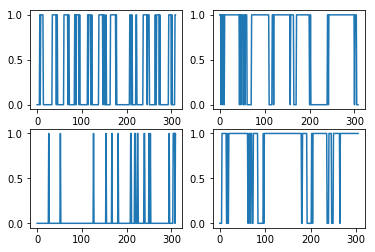

In [16]:
X, Y = get_XY()
clf = GaussianNB().fit(X, Y)
valid_X, valid_Y = get_validXY()
result = clf.predict(valid_X)

v = valid_Y == result
print(len(v)/len(valid_Y))
# fig = plt.figure()

rates = dict()

counts1 = 0
for i in v[:310]:
    if bool(i) == 1:
        counts1 += 1
rates['正手攻球'] = counts1/len(v[:310])

counts2 = 0
for i in v[310:309 + 310]:
    if bool(i) == 1:
        counts2 += 1
rates['反手攻球'] = counts2/len(v[310:309 + 310])

counts3 = 0
for i in v[309 + 310:309 + 310 + 310]:
    if bool(i) == 1:
        counts3 += 1
rates['反手发球'] = counts3/len(v[309 + 310:309 + 310 + 310])

counts4 = 0
for i in v[309 + 310 + 310:]:
    if bool(i) == 1:
        counts4 += 1
rates['正手发球'] = counts4/len(v[309 + 310 + 310:])

print(rates)

fig = plt.figure()
ax1 = fig.add_subplot('221')
ax2 = fig.add_subplot('222')
ax3 = fig.add_subplot('223')
ax4 = fig.add_subplot('224')
# v = [0, 0, 0, 0, 0, 1, 1, 1, 1 ]
ax1.plot(v[:310])
ax2.plot(v[310:309 + 310])
ax3.plot(v[309 + 310:309 + 310 + 310])
ax4.plot(v[309 + 310 + 310:])
plt.show()

1.0
{'正手攻球': 0.267741935483871, '反手攻球': 0.6310679611650486, '反手发球': 0.2870967741935484, '正手发球': 0.8098360655737705}


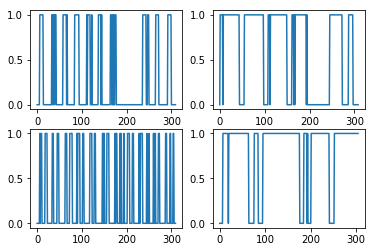

In [18]:
X, Y = get_XY()
clf = GaussianNB().fit(X, Y)
valid_X, valid_Y = get_validXY()
result = clf.predict(valid_X)

v = valid_Y == result
print(len(v)/len(valid_Y))
# fig = plt.figure()

rates = dict()

counts1 = 0
for i in v[:310]:
    if bool(i) == 1:
        counts1 += 1
rates['正手攻球'] = counts1/len(v[:310])

counts2 = 0
for i in v[310:309 + 310]:
    if bool(i) == 1:
        counts2 += 1
rates['反手攻球'] = counts2/len(v[310:309 + 310])

counts3 = 0
for i in v[309 + 310:309 + 310 + 310]:
    if bool(i) == 1:
        counts3 += 1
rates['反手发球'] = counts3/len(v[309 + 310:309 + 310 + 310])

counts4 = 0
for i in v[309 + 310 + 310:]:
    if bool(i) == 1:
        counts4 += 1
rates['正手发球'] = counts4/len(v[309 + 310 + 310:])

print(rates)

fig = plt.figure()
ax1 = fig.add_subplot('221')
ax2 = fig.add_subplot('222')
ax3 = fig.add_subplot('223')
ax4 = fig.add_subplot('224')
# v = [0, 0, 0, 0, 0, 1, 1, 1, 1 ]
ax1.plot(v[:310])
ax2.plot(v[310:309 + 310])
ax3.plot(v[309 + 310:309 + 310 + 310])
ax4.plot(v[309 + 310 + 310:])
plt.show()